In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tifffile

In [ ]:
# You must change the paths and column names to the appropriate sample each time!!

In [6]:
# This script takes a post-segmentation, post-cell type identification CSV and colora the actual segmentation masks with cluster identities
# Load clustered CSV

# The CSV at a minimum needs to have an cell index column as well as a column containing seurat cluster identities
clusters = pd.read_csv("/mnt/isilon/tan_lab_imaging/Analysis/bandyopads/NBM_CODEX_Atlas/Combined_Analysis/Seurat/Annotate_Cells_Step3/Cluster_CSVs/SB67_H14_mesmer_cluster_anno_l2_annotations_110322.csv")
# print(clusters.head)

# Load the whole-cell segmentation_predictions numpy array object 
# mask = np.load('/mnt/isilon/tan_lab_imaging/Analysis//bandyopads/SB67_NBM26_H10/mesmer/segmentation_predictions.npy')
mask = tifffile.imread('/mnt/isilon/tan_lab_imaging/FUSION/NBM28_H14_citrate/H14/Scan1/mesmer/Scan1_segmentation_cell.tif')
# mask_nuc = np.load('/mnt/isilon/tan_lab_imaging/Raw_CODEX_Data/Helm6982ARC_632021/mesmer/segmentation_predictions_nuclear.npy')

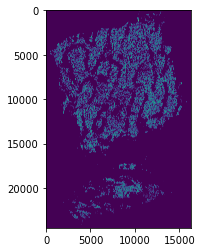

In [6]:
### Cluster Mask Generation Script

# Read in seurat metadata
clusters = pd.read_csv("/mnt/isilon/tan_lab_imaging/Analysis/bandyopads/NBM_CODEX_Atlas_Analysis/Cluster_Mask_Input/SB67_H10_mesmer_full_metadata_100722.csv")
# clusters = clusters.drop(labels=0, axis=0) # Remove row containing the 0 cell from Mesmer which is all the non-cells
# clusters["codex.meta.data.seurat_clusters"] = clusters["codex.meta.data.seurat_clusters"] + 1 # increase number of seurat clusters by one so that cluster zero is cluster one

# Initialize numpy array from segmentation mask
masks_out = mask.copy()
masks_out = np.array(masks_out).astype(int)

# Convert those cells that have been filtered out to zero
filter_mask = np.isin(masks_out,clusters['CellID'], invert=True)
masks_out[filter_mask] = 0

# Create dictionary mapping Cell ID keys to cluster values
mapping = dict(zip(clusters["CellID"], clusters["cluster_anno_l2_n"]))

# Define function to change the values in input array by key-value pairs from dict
def mp(entry):
    return mapping[entry] if entry in mapping.keys() else entry
mp = np.vectorize(mp)

# Convert values, plot output
out = mp(masks_out)
plt.imshow(out)

# print(out)

In [7]:
# save resulting mask
outCellClusterTif = "/mnt/isilon/tan_lab_imaging/Analysis/bandyopads/NBM_CODEX_Atlas_Analysis/Cluster_Masks/NBM27_H10_cluster_annol2_mask.npy"
np.save(outCellClusterTif, out)

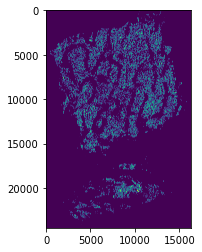

In [4]:
### Neighborhood Annotated Mask Generation Script

# Read in seurat metadata
clusters = pd.read_csv("/mnt/isilon/tan_lab_imaging/Analysis/bandyopads/NBM_CODEX_Atlas_Analysis/SB67_H10_neighborhood.csv")
# clusters = clusters.drop(labels=0, axis=0) # Remove row containing the 0 cell from Mesmer which is all the non-cells
clusters["neighborhood10"] = clusters["neighborhood10"] + 1 # increase number of seurat clusters by one so that cluster zero is cluster one

# Initialize numpy array from segmentation mask
masks_out = mask.copy()
masks_out = np.array(masks_out).astype(int)

# Convert those cells that have been filtered out to zero
filter_mask = np.isin(masks_out,clusters['CellID'], invert=True)
masks_out[filter_mask] = 0

# Create dictionary mapping Cell ID keys to cluster values
mapping = dict(zip(clusters["CellID"], clusters["neighborhood10"]))

# Define function to change the values in input array by key-value pairs from dict
def mp(entry):
    return mapping[entry] if entry in mapping.keys() else entry
mp = np.vectorize(mp)

# Convert values, plot output
out = mp(masks_out)
plt.imshow(out)

# print(out)

In [5]:
# save neighborhood mask
outCellClusterTif = "/mnt/isilon/tan_lab_imaging/Analysis/bandyopads/NBM_CODEX_Atlas_Analysis/SB67_H10_neighborhood_mask.npy"
np.save(outCellClusterTif, out)